In [0]:
%tensorflow_version 1.x
from keras.datasets.mnist import load_data
(x_train, y_train), (x_test, y_test)= load_data()

In [8]:
# Generator
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
generator = Sequential()
generator.add(Dense(256, activation="relu", input_dim=100))
generator.add(BatchNormalization())
generator.add(Dense(512, activation="relu"))
generator.add(BatchNormalization())
generator.add(Dense(784, activation="tanh"))
generator.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 256)               25856     
_________________________________________________________________
batch_normalization_9 (Batch (None, 256)               1024      
_________________________________________________________________
dense_14 (Dense)             (None, 512)               131584    
_________________________________________________________________
batch_normalization_10 (Batc (None, 512)               2048      
_________________________________________________________________
dense_15 (Dense)             (None, 784)               402192    
Total params: 562,704
Trainable params: 561,168
Non-trainable params: 1,536
_________________________________________________________________


In [13]:
discriminator = Sequential()
discriminator.add(Dense(256, input_dim=784, activation="relu"))
discriminator.add(Dropout(0.25))
discriminator.add(Dense(1, activation="sigmoid"))
discriminator.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 257       
Total params: 201,217
Trainable params: 201,217
Non-trainable params: 0
_________________________________________________________________


In [0]:
# 訓練流程
# 1. 訓練 Discriminator (1: 真的image-MNIST) (0: 假的image-現在的Gen)
# 2. 訓練 Generator (接上Dis[不動]在後面當作loss)

In [0]:
# 訓練版本(會動)
discriminator.compile(loss="binary_crossentropy",
                      optimizer="adam")

In [17]:
# 訓練gen版本(Dis不動)
from keras.models import Model
from keras.layers import Input
i = Input(shape=(100, ))
gen = generator(i)
discriminator.trainable = False
out = discriminator(gen)
gan = Model(inputs=i, outputs=out)
gan.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_5 (Sequential)    (None, 784)               562704    
_________________________________________________________________
sequential_10 (Sequential)   (None, 1)                 201217    
Total params: 763,921
Trainable params: 561,168
Non-trainable params: 202,753
_________________________________________________________________


In [0]:
gan.compile(loss="binary_crossentropy",
            optimizer="adam")

In [0]:
x_reshape = (x_train.reshape(-1, 784) - 127.5) / 127.5

In [87]:
import numpy as np
batch = 50

for i in range(100):
    print("Times:", i)
    # 警察看真的
    idx = np.random.randint(0, x_reshape.shape[0], batch)
    x = x_reshape[idx]
    y = np.ones((batch, ))
    real_loss = discriminator.train_on_batch(x, y)

    # 警察看假的
    rand = np.random.normal(0, 1, (batch, 100))
    fakex = generator.predict(rand)
    fakey = np.zeros((batch, ))
    fake_loss = discriminator.train_on_batch(fakex, fakey)

    print("Dis Loss:", (real_loss + fake_loss) / 2)

    # 小偷
    rand = np.random.normal(0, 1, (batch, 100))
    geny = np.ones((batch, ))
    gen_loss = gan.train_on_batch(rand, geny)
    print("Gen Loss:", gen_loss)
    print("*" * 30)

Times: 0
Dis Loss: 0.6965331435203552
Gen Loss: 0.71561813
******************************
Times: 1
Dis Loss: 0.647453248500824
Gen Loss: 0.7196187
******************************
Times: 2
Dis Loss: 0.6684439182281494
Gen Loss: 0.7331951
******************************
Times: 3
Dis Loss: 0.6646207571029663
Gen Loss: 0.73368317
******************************
Times: 4
Dis Loss: 0.6624350547790527
Gen Loss: 0.7199841
******************************
Times: 5
Dis Loss: 0.6862897276878357
Gen Loss: 0.72240496
******************************
Times: 6
Dis Loss: 0.6374037265777588
Gen Loss: 0.77858335
******************************
Times: 7
Dis Loss: 0.5970778465270996
Gen Loss: 0.7596234
******************************
Times: 8


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Dis Loss: 0.6352246999740601
Gen Loss: 0.7858598
******************************
Times: 9
Dis Loss: 0.6633301973342896
Gen Loss: 0.8571744
******************************
Times: 10
Dis Loss: 0.6505597829818726
Gen Loss: 0.8125461
******************************
Times: 11
Dis Loss: 0.6387442350387573
Gen Loss: 0.78580403
******************************
Times: 12
Dis Loss: 0.6530616879463196
Gen Loss: 0.80057204
******************************
Times: 13
Dis Loss: 0.6299878358840942
Gen Loss: 0.8502325
******************************
Times: 14
Dis Loss: 0.6549181938171387
Gen Loss: 0.7562918
******************************
Times: 15
Dis Loss: 0.6392450332641602
Gen Loss: 0.7877064
******************************
Times: 16
Dis Loss: 0.6419118642807007
Gen Loss: 0.7667128
******************************
Times: 17
Dis Loss: 0.6469337940216064
Gen Loss: 0.72366655
******************************
Times: 18
Dis Loss: 0.6322773694992065
Gen Loss: 0.7768404
******************************
Times: 19
Dis Loss

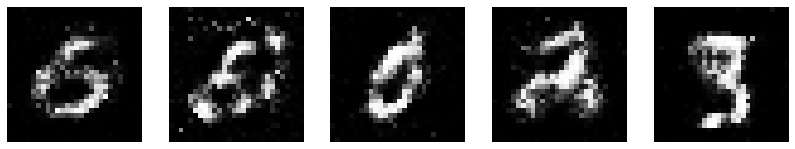

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline
# 拿出5個examples
examples = 5
# 準備五個靈感
noise = np.random.normal(0, 1, (examples, 100))
# 使用創作者開始創作
gen_imgs = generator.predict(noise)

# 這裡要注意一下, 必須讓-1-1回到0-1才能被正確印出來
gen_imgs = 0.5 * gen_imgs + 0.5
# reshape成為圖片
gen_imgs = gen_imgs.reshape(examples, 28, 28)
# 設定一下完整畫布大小
plt.figure(figsize = (14, 14))
for i in range(0, examples):
    # 將大圖分成1 * 5五小圖, 編號分別為
    # 1, 2, 3, 4, 5
    # 所以i必須+1來得到相對應的小圖
    plt.subplot(1, examples, i + 1)
    # 不打印座標軸
    plt.axis('off')
    # 秀出圖片
    plt.imshow(gen_imgs[i], cmap='gray')